In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import platform
import sys

In [2]:
if platform.node() == 'DESKTOP-L2QEF9I': #Andrew's AERTC PC
    scan_file_folder_path = 'C:/Users/Andrew/Box/Andrew and Patrick B.-Python Project -Cycling Data Analysis/Project Scripts/VoltageProfileScript/AN258-68-5E_100cycles.073 [SAMPLE DATA].xlsx'
elif platform.node() == 'LAPTOP-GPVHLAR6':#Andrew's Laptop
    scan_file_folder_path = 'C:/Users/Andrew/Box/Andrew and Patrick B.-Python Project -Cycling Data Analysis/Project Scripts/VoltageProfileScript/AN258-68-5E_100cycles.073 [SAMPLE DATA].xlsx'
else:
    sys.exit('Not a whitelisted file path. Add a filepath for this computer.')

In [3]:
def main():
    data = open_file(scan_file_folder_path)
    #print('Exported Data = \n', data)
    calcdata = spec_cap(actmass,data[0,:])
    #print('Specific Capcity = \n' ,calcdata)
    adjusted_cap_data = replace_cap(data,calcdata)
    print('Adjusted Capacity Data = \n',adjusted_cap_data)
    #print('Index 1:',adjusted_cap_data[0][0],'\n Index 2:',adjusted_cap_data[1][0])
    
    final_data = create_state_array2(adjusted_cap_data)
    vprof = plot_vprof(final_data)
    #print(len(char),len(dischar))
    #for caplst,vollst in zip(cap,vol):
     #   ncap = caplst
      #  nvol = vollst
       # plt.plot(ncap,nvol,'r',label='plot?')
    
    return vprof

In [4]:
def user_inputs(): #More inputs to be added later
    askfile = open_file(input('Enter file name [User directory]:\n'))
    #theocap = input('Enter Theoretical Capacity:\n')
    #actmass = input('Enter Active Mass:\n')
    return askfile

In [5]:
#%% ECHEM CALCS
def spec_cap(activemass,mAmph):
    
    spec_cap = mAmph / activemass
    return spec_cap
    #print(spec_cap) 

In [6]:
#%% FILE MANAGEMENT
def open_file(filename):
    rawdata = pd.read_excel(filename, skiprows=1, usecols=['mAmp-hr','Volts','State']) #reads excel as dataframe
    #print(rawdata)
    organizer = np.array((rawdata['mAmp-hr'],rawdata['Volts'],rawdata['State'])) #organizes select columns into numpy array
    #print(organizer[0,:])   
    return organizer


def replace_cap (data, spec_cap):
    data[0,:] = spec_cap
    adjusted_cap_data = data
    return adjusted_cap_data

def create_state_array2 (spec_cap_data):
    
    #Empty lists that will be filled by for loops
    capcharlst = [] #Charge Capacity
    volcharlst = [] #Charge Voltage
    capdislst = [] #Discharge Capacity
    voldislst = [] #Discharge Voltage
    
    #Temporary lists used to appened to permanent data lists
    captemplst=[]
    voltemplst=[]
    
#Charge Loop:
    for state,i in zip(spec_cap_data[2,:],range(spec_cap_data.shape[1])):
        if state == 'C':
            captemplst.append(spec_cap_data[0][i]) #Capacity column
            voltemplst.append(spec_cap_data[1][i]) #Voltage column
        elif state != 'C':
            if len(captemplst) > 0: #filter non "C" states
                capcharlst.append(captemplst)
                volcharlst.append(voltemplst)
                captemplst=[] #Clear temperoary lists
                voltemplst=[] #
            else:
                pass
#Discharge Loop:
    for state,i in zip(spec_cap_data[2,:],range(spec_cap_data.shape[1])):
        if state == 'D':
            captemplst.append(spec_cap_data[0][i]) #Capacity column
            voltemplst.append(spec_cap_data[1][i]) #Voltage column
        elif state != 'D':
            if len(captemplst) > 0: #filter non "D" states
                capdislst.append(captemplst)
                voldislst.append(voltemplst)
                captemplst=[] #Clear temperoary lists
                voltemplst=[] #
            else:
                pass
                
            
    return [[capcharlst,volcharlst],[capdislst,voldislst]]

In [7]:
#%% PLOTTING
def plot_vprof(data):
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    charge = data[0]
    discharge = data[1]
    
    #Charge Plot
    for cap,vol in zip(charge[0],charge[1]):
        ax.plot(cap,vol,'r',lw=0.6)
        
    #Discharge Plot
    for cap,vol in zip(discharge[0],discharge[1]):
        ax.plot(cap,vol,'b',lw=0.6)
        
    ax.set_xlabel('Specific Capacity (mAh g$^{-1}$)',fontsize=16)
    ax.set_ylabel('Voltage (V)',fontsize=16)
    ax.tick_params(axis='both',labelsize=14)
    ax.margins(x=0,y=0)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))

Adjusted Capacity Data = 
 [[0.0 0.0 0.0 ... 0.1968572259397 0.1974971487761 0.1974971487761]
 [3.637674525063 3.637064164187 3.637064164187 ... 3.743877317464
  3.749980926223 3.749980926223]
 ['R' 'R' 'R' ... 'C' 'C' 'O']]


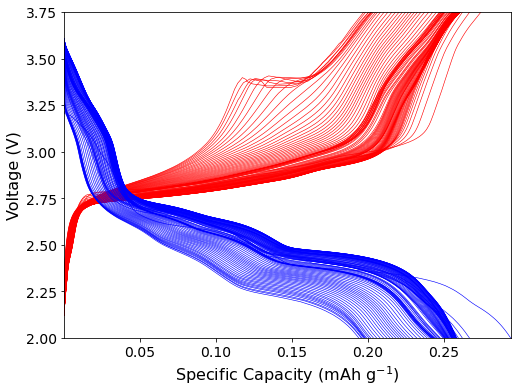

In [8]:
actmass = 10
main()